In [1]:
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
rf = Roboflow(api_key="WNJX84xQlZsMICKGFtRR")
project = rf.workspace().project("frc-field-detection")
model = project.version(1).model

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())


/Users/shravanprasanth/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


loading Roboflow workspace...
loading Roboflow project...


In [3]:
results = model.predict("/Users/shravanprasanth/Coding/Robotics/Scarlett-AI/src/main/camera.jpg").json()


{'x': 1537.5, 'y': 531.0, 'width': 2523.0, 'height': 980.0, 'confidence': 0.9902591109275818, 'class': 'field', 'class_id': 0, 'detection_id': '3efaa7ff-df2c-4ba2-b5c5-990111239050', 'keypoints': [{'x': 1260.0, 'y': 217.0, 'confidence': 0.99996018409729, 'class_id': 0, 'class_name': 'new-point-5'}, {'x': 1519.0, 'y': 216.0, 'confidence': 0.999978244304657, 'class_id': 1, 'class_name': 'new-point-8'}, {'x': 1523.0, 'y': 826.0, 'confidence': 0.9998811483383179, 'class_id': 2, 'class_name': 'new-point-9'}, {'x': 1785.0, 'y': 220.0, 'confidence': 0.9999707937240601, 'class_id': 3, 'class_name': 'new-point-12'}, {'x': 629.0, 'y': 214.0, 'confidence': 0.9985858798027039, 'class_id': 4, 'class_name': 'new-point-29'}, {'x': 422.0, 'y': 598.0, 'confidence': 0.9777400493621826, 'class_id': 5, 'class_name': 'new-point-31'}, {'x': 2604.0, 'y': 599.0, 'confidence': 0.9926714301109314, 'class_id': 6, 'class_name': 'new-point-33'}, {'x': 2396.0, 'y': 214.0, 'confidence': 0.9985768795013428, 'class_id

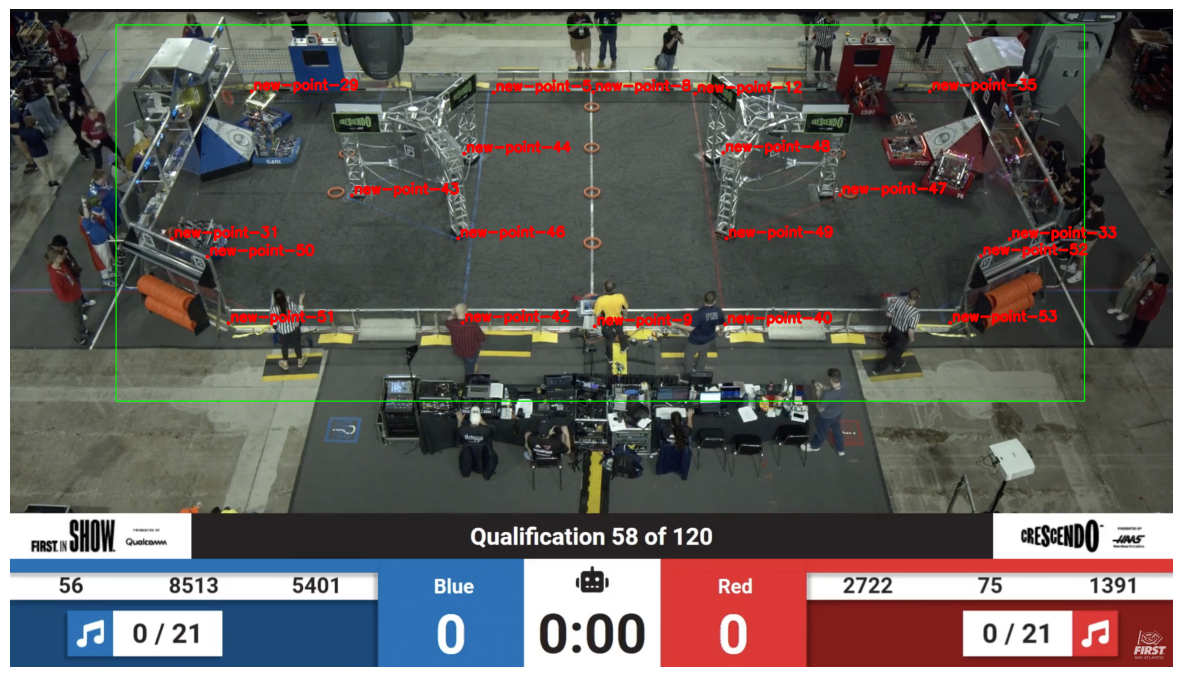

In [2]:
results = model.predict("camera.jpg").json()

# Read the original image
image = cv2.imread("camera.jpg")

# Get the first prediction (assuming there's only one field detected)
pred = results['predictions'][0]['predictions'][0]
print(pred)
# Draw the bounding box
x, y = int(pred['x'] - pred['width']/2), int(pred['y'] - pred['height']/2)
w, h = int(pred['width']), int(pred['height'])
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw all keypoints
for keypoint in pred['keypoints']:
    x, y = int(keypoint['x']), int(keypoint['y'])
    # Draw a circle for each keypoint
    cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
    # Optionally add keypoint name
    cv2.putText(image, keypoint['class_name'], (x + 5, y - 5), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 5)

# Display the image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 81 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 7.9 MB 5.5 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 5.2 MB/s eta 0:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
